# Network Intrusion Detection mit modernem Machine Learning

# Fach: Learning & Softcomputing

Geschreiben von:  
Alexander Belzer (Matr.Nr. inf104862)  
Maximilian Wendt (Matr.Nr. its105814)
    
Betreut von:  
Prof. Dr. Ulrich Hoffmann

## Inhaltsverzeichnis
1. [Einfuehrung](#einfuehrung)
2. [Datensatz NSL-KDD und Alternativen](#datensatz-nsl-kdd-und-alternativen)
3. [Einbinden der benoetigten Bibiliotheken mit Versionsangabe](#einbinden-der-benoetigten-bibiliotheken-mit-versionsangabe)
4. [Lesen und kennenlernen der Daten](#lesen-und-kennenlernen-der-daten)
5. [Daten Aufbereiten](#daten-aufbereiten)
6. [Daten Encodieren](#daten-encodieren)
7. [Daten in die vier Angriffskategorien aufteilen](#daten-in-die-vier-angriffskategorien-aufteilen)
8. [Daten Standartisieren und fuer das Modelltraining vorbereiten](#daten-standartisieren-und-fuer-das-modelltraining-vorbereiten)

## Einfuehrung

Durch die stätig wachsende Nutzung und Weiterentwicklung von IT-Systemen, werden auch Angreifer immer mehr aufmerksam auf diese Systeme. Netzwerk-Sicherheit ist ein fundamentales Konzept geworden, um wichtige Daten und Systeme zu schützen. Zur implementierung von Netzwerk-Sicherheit werden verschiedene Technologien wie Firewalls, VPNs, Antivirus-Software und Netwrok Intrusion Detection Systeme (NIDS) genutzt. Letzteres ist eine Möglichkeit den Datenfluss einen Netzwerkes konstanst zu beobachten und [dabei potientielle sicherheitsrelevante Vorfälle zu detektieren](https://www.juniper.net/de/de/research-topics/what-is-ids-ips.html). Die Idee von IDS wurde 1980 von Jim Anderson vorgestellt. Seither wurde die IDS Technologie immer weiter entwickelt und angepasst.  
Durch immer stätig wachsende komplexität der genuzten Netzwerke müssen auch NIDS Technologien immer besser werden. Bisherige NIDS implementierungen wurden größtenteils auf [basis von Signaturen entwickelt](https://www.researchgate.net/profile/Miguel-Correia-13/publication/338301657_Big_Data_Analytics_for_Intrusion_Detection/links/6058818f299bf173675cacbe/Big-Data-Analytics-for-Intrusion-Detection.pdf), die Angriffe durch einfaches vergleichen erkennen sollten. Signatur basierte NIDS sind [beschränkt auf bekannte Angriffstechniken](https://www.cse.wustl.edu/%7Ejain/cse571-07/ftp/ids/) und damit machtlos gegen Zero-Day exploits. Weiterhin können Signatur basierte NIDS durch die wachsende Anzahl von möglichen Angriffen [ineffizient werden](https://www.cse.wustl.edu/%7Ejain/cse571-07/ftp/ids/), da für jedes beobachtete Datenpaket alle möglichen Angriffsignaturen überprüft werden muss.  
Um diese Umstände zu verbessen können moderne Machine Learning Modelle genutzt werden. Die Modelle werden genutzt, um auf Anomalien im Datenverkehr hinzuweisen. Durch die schnelle Entwicklung von Machine Learning setzen immer mehr [NIDS Produkte auf diese Technologie](https://www.cse.wustl.edu/%7Ejain/cse571-07/ftp/ids/#sec4).  
In dieser Arbeit werden wir verschiedene Machine Learning Modelle trainieren und zeigen wie gut diese Modelle darin sind Anomalien zu entdecken. Ebenfalls werden wir in der Lage sein verschiedenen ANgriffstypen zu erkennen.
Als Basis dieser Arbeit wurde das Paper "[Herve Nkiama, Syed Zainudeen Mohd Said, Muhammad Saidu: A Subset Feature Elimination Mechanism for Intrusion Detection System](https://thesai.org/Downloads/Volume7No4/Paper_19-A_Subset_Feature_Elimination_Mechanism_for_Intrusion_Detection_System.pdf)" genutzt.

## Datensatz NSL-KDD und Alternativen

In diesem Kapitel stellen wir den in dieser Arbeit genutzten Datensatz vor. Außerdem präsentieren wir noch einige zusätzliche Datensätze die als alternative für andere Projekte ich betracht gezogen werden können.

### NSL-KDD

Das MIT Lincoln Lab entwickelte den [KDD 1999 Datensatz](http://kdd.ics.uci.edu/databases/kddcup99), der bis in das letzte Jahrzenht von Forschen genutzt wurde. Der Datensatz hält eine große Anzahl von Einträgen und Attributen, was ihn besonders nützlich für die Arbeit mit Machine Learning macht. Allerdings, weist der Datensatz [siginifikante Mängel](https://dl.acm.org/doi/10.1145/382912.382923) auf. Zu diesen Mängeln gehören eine nicht triviale Menge an Redundanten einträgen, was die Performance von Maschine Learning beeinträchtigen kann. Außerdem befinden sich doppelte Einträge innerhalb des Test Datensatzes, was zu [Voreingenommenheit bei der Detektion von Anomalien führen kann](https://thesai.org/Downloads/Volume7No4/Paper_19-A_Subset_Feature_Elimination_Mechanism_for_Intrusion_Detection_System.pdf).  
Aus diesen Gründen wurde der [NSL-KDD Datensatz](https://www.kaggle.com/hassan06/nslkdd) entwickelt. Dieser Datensatz soll  gegenüber seinem Vörgänger folgende Verbesserungen aufweisen:

+ Es werden keine redundanten Datensätze in die Trainingsmenge aufgenommen, so dass die Klassifikatoren nicht auf häufigere Datensätze ausgerichtet sind.
+ In den vorgeschlagenen Testsätzen gibt es keine doppelten Datensätze; daher wird die Performanz der Modelle nicht durch die Methoden verzerrt, die bessere Erkennungsraten bei den häufigen Datensätzen haben.
+ Die Anzahl der ausgewählten Datensätze aus jedem Schwiergkeitalevel ist umgekehrt proportional zu dem Prozentsatz der Datensätze im ursprünglichen KDD-Datensatz. Infolgedessen variieren die Klassifizierungsraten verschiedener maschineller Lernmethoden in einem größeren Bereich, was eine genaue Bewertung der verschiedenen Lerntechniken effizienter macht.
+ Die Anzahl der Datensätze in den Trainings- und Testdatensätzen ist überschaubarer, so dass es erschwinglich ist, die Experimente mit dem gesamten Satz durchzuführen, ohne dass ein kleiner Teil zufällig ausgewählt werden muss. Infolgedessen werden die Bewertungsergebnisse verschiedener Forschungsarbeiten konsistent und vergleichbar sein.   

Eine weitere Besonderheit ist, dass die Daten dieses Datensatzen in vier Angriffstypen aufgeteilt werden können. Somit ist es möglich verschiedene Angriffstypen zu erkennen. Die vier möglichen Kategorien sind:

+ DoS (Denial of Service)
+ Probe (Scanns)
+ R2L (Remote Angriffe, wie Brute Forcing)
+ U2L (Ausnutzen lokaler schwachstellen, wie z.B. Buffer Overflows)

Wir haben uns für diesen Datensatz entschieden, da es eine große Anzahl bestehender Arbeiten zu diesem Datensatz und seinem Vorgänger gibt.

### Alternative Datensätze

Bei der Recherche zu möglchen Datensätzen sind wir auf weitere Datensätze gestoßen, die für zukünfige Arbeiten ebenfalls Potential haben. Hier eine kurze Vorstellungen dieser Datensätze:

+ **Kyoto2006\+**: Dieser Datensatz wurde aus den Aufzeichnungen des Netzwerkverkehrs erstellt, die durch den Einsatz von Honeypots, Darknet-Sensoren, E-Mail-Servern, Web-Crawlern und anderen Netzwerksicherheitsmaßnahmen der Universität Kyoto gewonnen wurden. Der aktuellste Datensatz umfasst die Verkehrsaufzeichnungen von 2006 bis 2015. Jeder Datensatz hat 24 statistische Merkmale, von denen 14 aus dem KDD 1999-Datensatz stammen, während die restlichen 10 zusätzliche Merkmale sind  
+ **UNSW-NB15**: Dieser Datensatz wurde vom Australian Center für Cyber Security erstellt. Er enthält etwa zwei Millionen Datensätze mit insgesamt 49 Attributen, die mit Bro-IDS, Argus-Tools und einigen neu entwickelten Algorithmen extrahiert wurden. Dieser Datensatz enthält die folgenden Angriffsarten: Würmer, Shellcode, Aufklärungsangriffe, Port-Scans, generische Angriffe, Backdoor, DoS, Exploits und Fuzzers.  
+ **CIC-IDS2017**: Dieser Datensatz wurde 2017 vom Canadian Institute of Cyber Security (CIC) erstellt. Er enthält die normalen Datenströme und Angriffe. Der Netzwerkverkehr wird von CICFlowMeter anhand von Zeitstempeln, Quell- und Ziel-IP-Adressen, Protokollen und Angriffen analysiert. Darüber hinaus enthält CICIDS2017 gängige Angriffsszenarien wie Brute-Force-Angriffe, Heartbleed-Angriffe, Botnets, Denial-of-Service-Angriffe (DoS), verteilte DoS-Angriffe (DDoS), Web-Angriffe und Infiltrationsangriffe.

## Einbinden der benoetigten Bibiliotheken mit Versionsangabe

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import sklearn
import matplotlib
import time
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from sklearn.metrics import accuracy_score

print(f"General Info:       {sys.version}")
print(f"Pandas Version:     {pd.__version__}")
print(f"Numpy Version:      {np.__version__}")
print(f"SkLearn Version:    {sklearn.__version__}")
print(f"matplotlib Version: {matplotlib.__version__}")

General Info:       3.9.13 (main, May 24 2022, 21:28:31) 
[Clang 13.1.6 (clang-1316.0.21.2)]
Pandas Version:     1.4.2
Numpy Version:      1.22.4
SkLearn Version:    1.1.1
matplotlib Version: 3.5.2


## Lesen und kennenlernen der Daten

In diesem Kapitel werden die Trainings- und Testdaten eingelesen. Gleichzeitig beschriften wir die Daten richtig und bekommen eine erste Übersicht über die Daten. Wir lassen uns ebenfalls verschiedenste statistische Werte der Daten ausgeben.

### Erstes Lesen der Daten und hinzufügen von Spaltenbezeichnungen

Bevor die Daten im NSL-KDD Datensatz für verschiede ML Modelle genutzt werden können, müssen diese erstmal eingelesen werden. Hierbei werden die einzelnen Spalten auch mit den richtigen Bezeichnungen versehen.

In [2]:
# OS Pfad der Daten aufbauen
kdd_train_set_path = os.path.join("nsl-kdd", "KDDTrain+.txt")
kdd_test_set_path  = os.path.join("nsl-kdd", "KDDTest+.txt")

#train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
#test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

# Array mit Spaltennamen
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

# Lesen der Daten und gleichzeitges zuordnen der Spaltennamen

#df_train = pd.read_csv(train_url,header=None, names = col_names)

#df_test = pd.read_csv(test_url, header=None, names = col_names)
df_train = pd.read_csv(kdd_train_set_path, header=None, names = col_names)
df_test  = pd.read_csv(kdd_test_set_path, header=None, names = col_names)

### Erste Sicht auf die Daten

In [3]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


### Dimsension der Daten

In [5]:
print(f"Dimension der Trainings Daten {df_train.shape}")
print(f"Dimension der Test Daten:     {df_test.shape}")

Dimension der Trainings Daten (125973, 42)
Dimension der Test Daten:     (22544, 42)


### Anzahl an verschiedenen Angriffen

In [6]:
df_train[df_train["label"] != 'normal']['label'].nunique()

22

### Prüfen auf Null Einträge

In [7]:
df_train[df_train.isna().any(axis=1)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label


In [8]:
df_test[df_test.isna().any(axis=1)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label


Keine Null Einträge vorhanden.

### Statistische Daten ueber die Labels

In [9]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [10]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,22544.0,218.859076,1407.176612,0.0,0.00,0.00,0.0000,57715.0
src_bytes,22544.0,10395.450231,472786.431088,0.0,0.00,54.00,287.0000,62825648.0
dst_bytes,22544.0,2056.018808,21219.297609,0.0,0.00,46.00,601.0000,1345927.0
land,22544.0,0.000311,0.017619,0.0,0.00,0.00,0.0000,1.0
wrong_fragment,22544.0,0.008428,0.142599,0.0,0.00,0.00,0.0000,3.0
urgent,22544.0,0.000710,0.036473,0.0,0.00,0.00,0.0000,3.0
hot,22544.0,0.105394,0.928428,0.0,0.00,0.00,0.0000,101.0
num_failed_logins,22544.0,0.021647,0.150328,0.0,0.00,0.00,0.0000,4.0
logged_in,22544.0,0.442202,0.496659,0.0,0.00,0.00,1.0000,1.0
num_compromised,22544.0,0.119899,7.269597,0.0,0.00,0.00,0.0000,796.0


Auffällig ist hier, dass das Feature "num_outbound_cmd" keinen statistischen Wert für den Datensatz hat. Dieses Feature kann also in den kommenden Kapiteln eleminiert werden.

### Label Verteilung

Hier zeigen wir welche Label im Datensatz präsent sind und wir diese Verteilt sind.

In [11]:
print(df_train['label'].value_counts())

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


In [12]:
print(df_test['label'].value_counts())

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: label, dtype: int64


Es fällt auf, dass die Testdaten mehr Angriffstypen haben als die Trainingsdaten. Dies kann zu schlechteren Ergebnissen der ML Modelle führen und sollte in den kommenden Kapiteln gelöst werden.

### Identifieziren der Features mit Kategorie

Dieses Kapitel dient nur einen kleinen Übersicht über die verschiedenen Kategorischen Features.

In [13]:
print('Trainings Daten:')
# Schleife über Spalten
for col_name in df_train.columns:
    # Prüfung, ob aktuelle Spalte eine Objekt ist (Kategorisches Label)
    if df_train[col_name].dtypes == 'object':
        # Ausgabe des Labels und Anzahl der Kategorien
        unique_cat = len(df_train[col_name].unique())
        print(f"Feature '{col_name}' has {unique_cat} categories")

Trainings Daten:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories


In [14]:
print('Test Daten:')
# Schleife über Spalten
for col_name in df_test.columns:
    # Prüfung, ob aktuelle Spalte eine Objekt ist (Kategorisches Label)
    if df_test[col_name].dtypes == 'object':
        # Ausgabe des Labels und Anzahl der Kategorien
        unique_cat = len(df_test[col_name].unique())
        print(f"Feature '{col_name}' has {unique_cat} categories")

Test Daten:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


### Grafische Darstellung der Verteilung der Kategorien

Hier zeigen wir einmal, wie die einzelnen Kategorischen Features verteilt sind.

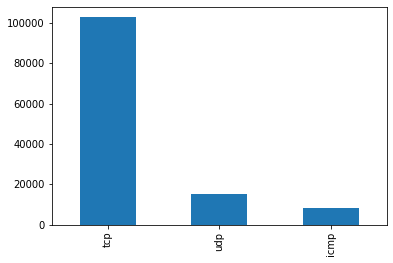

In [15]:
df_train["protocol_type"].value_counts().plot(kind="bar")
plt.savefig("artefacts/Train Set Protocal Type Verteilung", dpi=500)

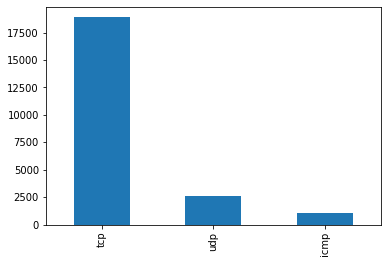

In [16]:
df_test["protocol_type"].value_counts().plot(kind="bar")
plt.savefig("artefacts/Test Set Protocal Type Verteilung", dpi=500)

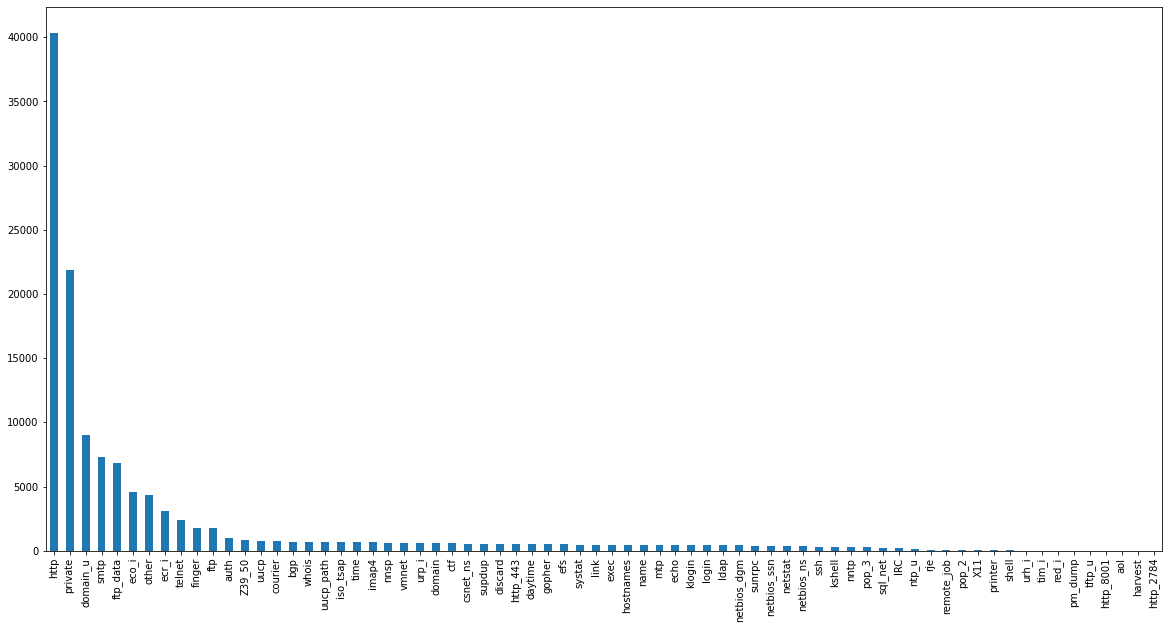

In [17]:
df_train["service"].value_counts().plot(kind="bar", figsize=(20,10))
plt.savefig("artefacts/Train Set Service Verteilung", dpi=500)

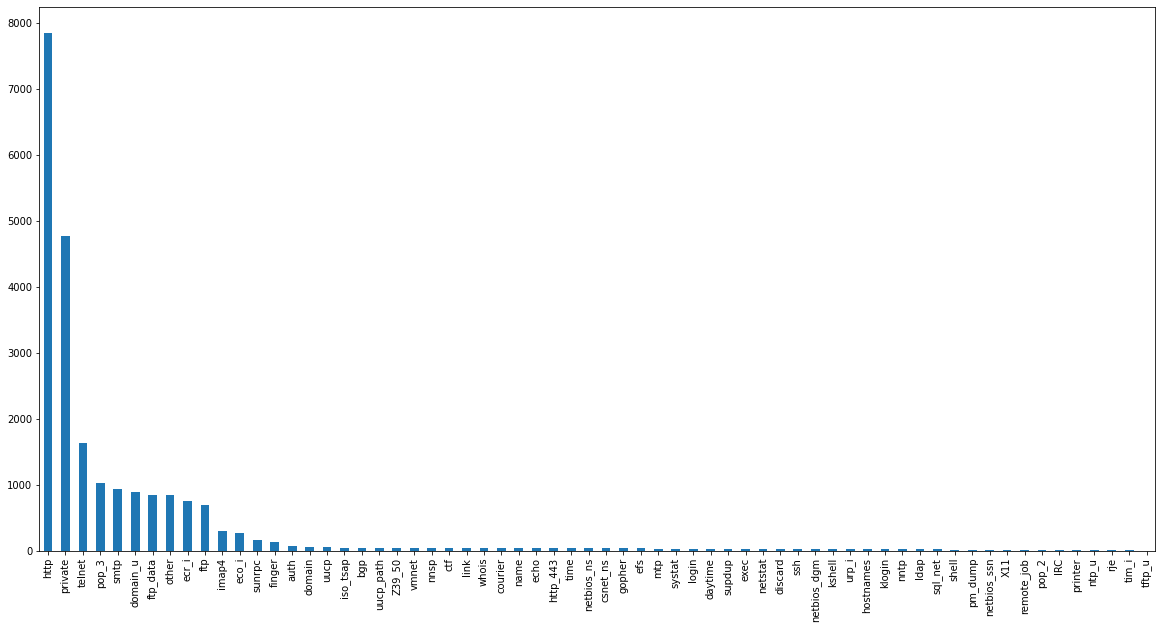

In [18]:
df_test["service"].value_counts().plot(kind="bar", figsize=(20,10))
plt.savefig("artefacts/Test Set Service Verteilung", dpi=500)

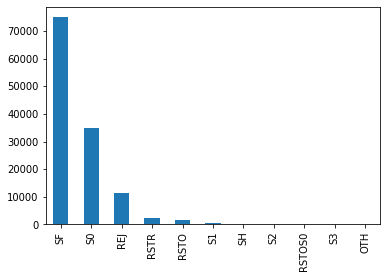

In [19]:
df_train["flag"].value_counts().plot(kind="bar")
plt.savefig("artefacts/Train Set Flag Verteilung", dpi=500)

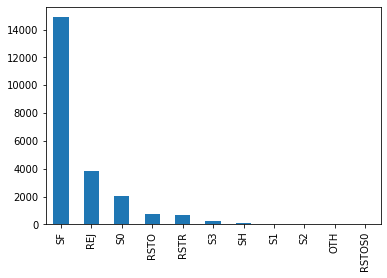

In [20]:
df_test["flag"].value_counts().plot(kind="bar")
plt.savefig("artefacts/Test Set Service Verteilung", dpi=500)

## Daten aufbereiten

In diesem Kapitel geht es hauptsächlich darum, die Daten so voruubereiten, dass diese nicht möglichst  wenig unnötige Features enthalten.

Wie im Kaptiel "[Statistische Daten ueber die Labels](#statistische-daten-ueber-die-labels)" zu sehen ist, hat das Feature "num_outbound_cmds" keine statistische relevanz und wird daher nicht zu einer höheren effizenz der Modelle beitragen. Diese Feature kann entfernt werden.

In [21]:
df_train.drop(columns="num_outbound_cmds", inplace=True)
df_test.drop(columns="num_outbound_cmds", inplace=True)

### Korrelation der Labels mit einer Heatmap ermitteln

Um zu prüfen, ob die Daten weitere Features mit wenig relevanz für die ML Modelle beinhalten, prüfen wir stark die einzelnen Features miteinander Korrelieren. Hierfür erstellen wir eine grafische Heatmap dessen "heiße" Felder indikatoren für starke Korrelation der jeweiligen Features sind. 

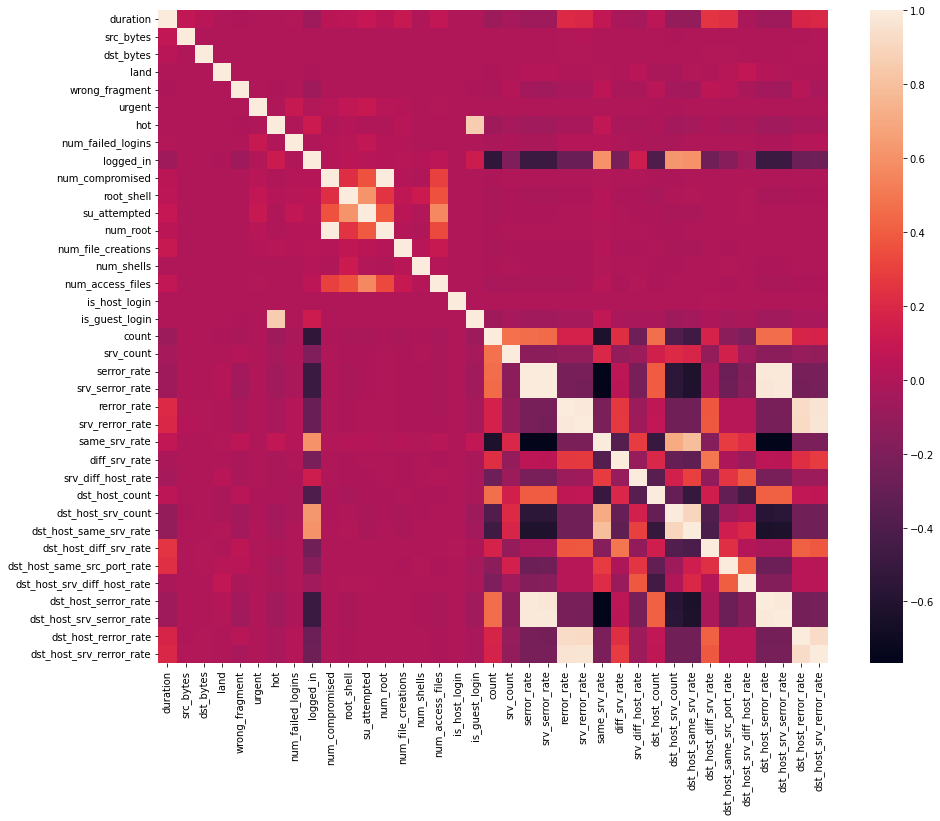

In [22]:
plt.subplots(figsize=(15, 12))
sns.heatmap(df_train.corr())
plt.savefig("artefacts/Correlation heatmap before", dpi=500)

Zu sehen ist hier eine klare Diagonale, die angibt, dass Features offensichtlich mit sich selbst korrelieren. Unterhalb der Diagonale ist ersichtich, dass verschiedene Features ebanfalls stark miteinander korrelieren. Diese Features haben aufgrund ihrer Ähnlichkeit zu anderen Labels keinen signifikanten Einfluss auf das Ergebnis von Modellen. Im folgenden werden diese Features gelöscht.

In [23]:
drop_list = ['num_root', 'srv_serror_rate', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_same_srv_rate']
df_train.drop(columns=drop_list, inplace=True)
df_test.drop(columns=drop_list, inplace=True)

Bei ernuerter Augabe der Heatmap ist zu sehen, dass die stark miteiander korrelierenden Features jetzt nicht mehr vorhanden sind.

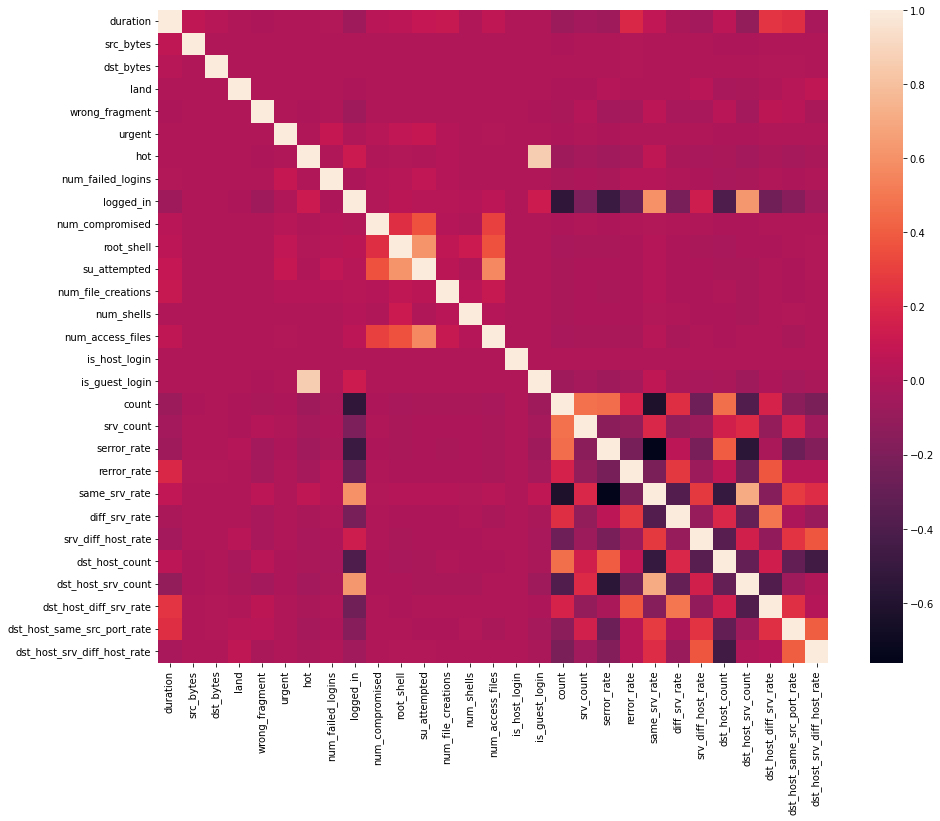

In [24]:
plt.subplots(figsize=(15, 12))
sns.heatmap(df_train.corr())
plt.savefig("artefacts/Correlation heatmap after", dpi=500)

In [25]:
print(df_train.shape)
print(df_test.shape)

(125973, 33)
(22544, 33)


Nach dem Löschen der verschiedenen Features bleiben noch 32 (33 Spalten - Label Spalte) Features über.

### Daten ausgleichen

Im Kapitel [Label Verteilung](#label-verteilung), haben wir gesehen, dass die Testdaten mehr Angriffstypen haben als die Trainingsdaten. Dies wird beim Testen der Modelle für schlechere Werte sorgen, da das Modell diese Angriffstypen nicht kennt. Dies gleichen wir hier aus in dem wir Daten aus dem Testsatz in den Trainingssatz einfügen.

In [28]:
test_attack=df_test['label'].unique().tolist()
train_attack=df_train['label'].unique().tolist()
print(len(test_attack))
print(len(train_attack))
l1=list(set(test_attack)-set(train_attack))
print(l1)
# df_test['label'] = df_test['label'].replace(
#     l1, np.nan)
# df_test = df_test.dropna()
# df_test['label'].nunique()

df_required=df_test[(df_test['label']=='sendmail') | (df_test['label']=='mailbomb') | (df_test['label']=='worm') | (df_test['label']=='xsnoop') | (df_test['label']=='processtable') |
(df_test['label']=='httptunnel') | (df_test['label']=='sqlattack') | (df_test['label']=='mscan') | (df_test['label']=='udpstorm') | (df_test['label']=='xlock') |
(df_test['label']=='apache2') | (df_test['label']=='saint') | (df_test['label']=='snmpgetattack') | (df_test['label']=='xterm') |(df_test['label']=='named') | (df_test['label']=='ps') | (df_test['label']=='snmpguess')]

df_train=pd.concat([df_train,df_required],axis=0)

38
23
['processtable', 'sqlattack', 'xlock', 'httptunnel', 'mailbomb', 'udpstorm', 'saint', 'xsnoop', 'apache2', 'xterm', 'named', 'sendmail', 'snmpgetattack', 'ps', 'snmpguess', 'worm', 'mscan']


## Daten Encodieren

Wir Encodieren die Daten zu numerischen werten, damit die ML Modelle besser mit Ihnen umgehen können. Hierfür verwenden wir den sklearn LabelEncoder. Einzig die Labels selber encodieren wir per Hand und später zu wissen welche Nummern zu welchen Labeln (Angriffstypen) gehören.

In [29]:
from sklearn.preprocessing import LabelEncoder

lc = LabelEncoder()

In [30]:
categorical_columns = ['protocol_type', 'service', 'flag']

df_train['protocol_type'] = lc.fit_transform(df_train['protocol_type'])
df_train['service'] = lc.fit_transform(df_train['service'])
df_train['flag'] = lc.fit_transform(df_train['flag'])

df_test['protocol_type'] = lc.fit_transform(df_test['protocol_type'])
df_test['service'] = lc.fit_transform(df_test['service'])
df_test['flag'] = lc.fit_transform(df_test['flag'])

df_train['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4},inplace=True)
df_test['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4},inplace=True)

In [31]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label
0,0,1,20,9,491,0,0,0,0,0,...,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,0
1,0,2,44,9,146,0,0,0,0,0,...,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,0
2,0,1,49,5,0,0,0,0,0,0,...,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,0,...,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,0
4,0,1,24,9,199,420,0,0,0,0,...,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,0


## Daten in die vier Angriffskategorien aufteilen

Um zu sehen wie gut wir einzelne Angriffskategorien erkennen können teilen wir die Daten in die vier möglichen Kategorien auf. Hierfür werden alle Datensätze mit Labeln, die nicht zu der jeweiligen Angriffskategorie gehöen gelöscht.

In [32]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]

# Training Set
DoS_df = df_train[~df_train['label'].isin(to_drop_DoS)];
Probe_df = df_train[~df_train['label'].isin(to_drop_Probe)];
R2L_df = df_train[~df_train['label'].isin(to_drop_R2L)];
U2R_df = df_train[~df_train['label'].isin(to_drop_U2R)];

# Test Set
DoS_df_test = df_test[~df_test['label'].isin(to_drop_DoS)];
Probe_df_test = df_test[~df_test['label'].isin(to_drop_Probe)];
R2L_df_test = df_test[~df_test['label'].isin(to_drop_R2L)];
U2R_df_test = df_test[~df_test['label'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (114989, 33)
Dimensions of Probe: (80314, 33)
Dimensions of R2L: (69024, 33)
Dimensions of U2R: (67425, 33)
Test:
Dimensions of DoS: (17171, 33)
Dimensions of Probe: (12132, 33)
Dimensions of R2L: (12596, 33)
Dimensions of U2R: (9778, 33)


## Daten Standartisieren und fuer das Modelltraining vorbereiten

Hier nutzen wir einen MinMaxScaler, um unsere Daten in eine Standartisierte Form zu bringen. Weiterhin teilen wir die Daten in X und Y auf. Wobei X für alle Daten ohne Label steht und Y für die dazugehörigen Label.

In [33]:
# Training Set
X_DoS = DoS_df.drop(columns='label')
Y_DoS = DoS_df.label

X_Probe = Probe_df.drop(columns='label')
Y_Probe = Probe_df.label

X_R2L = R2L_df.drop(columns='label')
Y_R2L = R2L_df.label

X_U2R = U2R_df.drop(columns='label')
Y_U2R = U2R_df.label

# Test Set

X_DoS_test = DoS_df_test.drop(columns='label')
Y_DoS_test = DoS_df_test.label

X_Probe_test = Probe_df_test.drop(columns='label')
Y_Probe_test = Probe_df_test.label

X_R2L_test = R2L_df_test.drop(columns='label')
Y_R2L_test = R2L_df_test.label

X_U2R_test = U2R_df_test.drop(columns='label')
Y_U2R_test = U2R_df_test.label

In [34]:
colNames = list(X_DoS)
colNames_test = list(X_DoS)

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler_dos = MinMaxScaler().fit(X_DoS)
X_DoS = scaler_dos.transform(X_DoS)

scaler_probe = MinMaxScaler().fit(X_Probe)
X_Probe = scaler_probe.transform(X_Probe)

scaler_r2l = MinMaxScaler().fit(X_R2L)
X_R2L = scaler_r2l.transform(X_R2L)

scaler_u2r = MinMaxScaler().fit(X_U2R)
X_U2R = scaler_u2r.transform(X_U2R)

# Testset
scaler_dos_test = MinMaxScaler().fit(X_DoS_test)
X_DoS_test = scaler_dos_test.transform(X_DoS_test)

scaler_probe_test = MinMaxScaler().fit(X_Probe_test)
X_Probe_test = scaler_probe_test.transform(X_Probe_test)

scaler_r2l_test = MinMaxScaler().fit(X_R2L_test)
X_R2L_test = scaler_r2l_test.transform(X_R2L_test)

scaler_u2r_test = MinMaxScaler().fit(X_U2R_test)
X_U2R_test = scaler_u2r_test.transform(X_U2R_test)

## Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [37]:
#selector = SelectKBest(score_func=chi2, k=25)

In [38]:
#df_X_DoS = pd.DataFrame(X_DoS, columns=colNames)
#df_X_DoS_test = pd.DataFrame(X_DoS_test, columns=colNames)
#fit = selector.fit(X_DoS, Y_DoS)
#X_DoS = fit.transform(X_DoS)
#new_features = df_X_DoS.columns[selector.get_support(indices=True)]

#X_DoS = df_X_DoS[new_features]
#X_DoS_test = df_X_DoS_test[new_features]
#X_DoS.shape

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = DecisionTreeClassifier(random_state=0)
clf3 = DecisionTreeClassifier(random_state=0)
clf4 = DecisionTreeClassifier(random_state=0)
t = time()
clf1.fit(X_DoS, Y_DoS)
clf2.fit(X_Probe, Y_Probe)
clf3.fit(X_R2L, Y_R2L)
clf4.fit(X_U2R, Y_U2R)
tt1 = time() - t
print("Classifier trained in {} seconds.".format(round(tt1, 3)))

Classifier trained in 1.081 seconds.


In [41]:
predDT1 = clf1.predict(X_DoS_test)
predDT2 = clf2.predict(X_Probe_test)
predDT3 = clf3.predict(X_R2L_test)
predDT4 = clf4.predict(X_U2R_test)

In [42]:
accDT1 = accuracy_score(Y_DoS_test, predDT1)
accDT2 = accuracy_score(Y_Probe_test, predDT2)
accDT3 = accuracy_score(Y_R2L_test, predDT3)
accDT4 = accuracy_score(Y_U2R_test, predDT4)
print("Accuracy is {}.".format(round(accDT1, 4)))
print("Accuracy is {}.".format(round(accDT2, 4)))
print("Accuracy is {}.".format(round(accDT3, 4)))
print("Accuracy is {}.".format(round(accDT4, 4)))

Accuracy is 0.9617.
Accuracy is 0.9074.
Accuracy is 0.8283.
Accuracy is 0.9946.


## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf1 = RandomForestClassifier(n_estimators=300, random_state = 40, n_jobs =-1)
clf1 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf2 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf3 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf4 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
t = time()
clf1.fit(X_DoS, Y_DoS)
clf2.fit(X_Probe, Y_Probe)
clf3.fit(X_R2L, Y_R2L)
clf4.fit(X_U2R, Y_U2R)
tt1 = time() - t
print("Classifier trained in {} seconds.".format(round(tt1, 3)))

Classifier trained in 12.19 seconds.


In [45]:
t0 = time()
predRF1 = clf1.predict(X_DoS_test)
predRF2 = clf2.predict(X_Probe_test)
predRF3 = clf3.predict(X_R2L_test)
predRF4 = clf4.predict(X_U2R_test)

tt22 = time() - t0
print("Predicted in {} seconds".format(round(tt22, 3)))
print(predRF1)

Predicted in 0.318 seconds
[1 1 0 ... 0 1 0]


In [46]:
accRF1 = accuracy_score(Y_DoS_test, predRF1)
accRF2 = accuracy_score(Y_Probe_test, predRF2)
accRF3 = accuracy_score(Y_R2L_test, predRF3)
accRF4 = accuracy_score(Y_U2R_test, predRF4)
print("Accuracy is {}.".format(round(accRF1, 4)))
print("Accuracy is {}.".format(round(accRF2, 4)))
print("Accuracy is {}.".format(round(accRF3, 4)))
print("Accuracy is {}.".format(round(accRF4, 4)))

Accuracy is 0.9303.
Accuracy is 0.9733.
Accuracy is 0.8199.
Accuracy is 0.9954.


## One-Hot Encoding

## Naive Bayes

In [47]:
from sklearn.naive_bayes import BernoulliNB

In [48]:
clf1 = BernoulliNB()
clf2 = BernoulliNB()
clf3 = BernoulliNB()
clf4 = BernoulliNB()
t0 = time()
clf1.fit(X_DoS, Y_DoS)
clf2.fit(X_Probe, Y_Probe)
clf3.fit(X_R2L, Y_R2L)
clf4.fit(X_U2R, Y_U2R)
tt3 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt3, 3)))

Classifier trained in 0.177 seconds.


In [49]:
predDT1 = clf1.predict(X_DoS_test)
predDT2 = clf2.predict(X_Probe_test)
predDT3 = clf3.predict(X_R2L_test)
predDT4 = clf4.predict(X_U2R_test)

In [50]:
accNB1 = accuracy_score(Y_DoS_test, predDT1)
accNB2 = accuracy_score(Y_Probe_test, predDT2)
accNB3 = accuracy_score(Y_R2L_test, predDT3)
accNB4 = accuracy_score(Y_U2R_test, predDT4)
print("Accuracy is {}.".format(round(accNB1, 4)))
print("Accuracy is {}.".format(round(accNB2, 4)))
print("Accuracy is {}.".format(round(accNB3, 4)))
print("Accuracy is {}.".format(round(accNB4, 4)))


Accuracy is 0.8557.
Accuracy is 0.938.
Accuracy is 0.8241.
Accuracy is 0.9965.


# SUPPORT VECTOR MACHINE

In [51]:
from sklearn.svm import LinearSVC
clf1= LinearSVC(random_state=0)
clf2= LinearSVC(random_state=0)
clf3= LinearSVC(random_state=0)
clf4= LinearSVC(random_state=0)
t0 = time()
clf1.fit(X_DoS, Y_DoS)
clf2.fit(X_Probe, Y_Probe)
clf3.fit(X_R2L, Y_R2L)
clf4.fit(X_U2R, Y_U2R)
tt5 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt5, 3)))

Classifier trained in 4.17 seconds.


In [52]:
predSVM1 = clf1.predict(X_DoS_test)
predSVM2 = clf2.predict(X_Probe_test)
predSVM3 = clf3.predict(X_R2L_test)
predSVM4 = clf4.predict(X_U2R_test)

In [53]:
accSVM1 = accuracy_score(Y_DoS_test, predSVM1)
accSVM2 = accuracy_score(Y_Probe_test, predSVM2)
accSVM3 = accuracy_score(Y_R2L_test, predSVM3)
accSVM4 = accuracy_score(Y_U2R_test, predSVM4)
print("Accuracy is {}.".format(round(accSVM1, 4)))
print("Accuracy is {}.".format(round(accSVM2, 4)))
print("Accuracy is {}.".format(round(accSVM3, 4)))
print("Accuracy is {}.".format(round(accSVM4, 4)))

Accuracy is 0.923.
Accuracy is 0.9646.
Accuracy is 0.7721.
Accuracy is 0.9957.


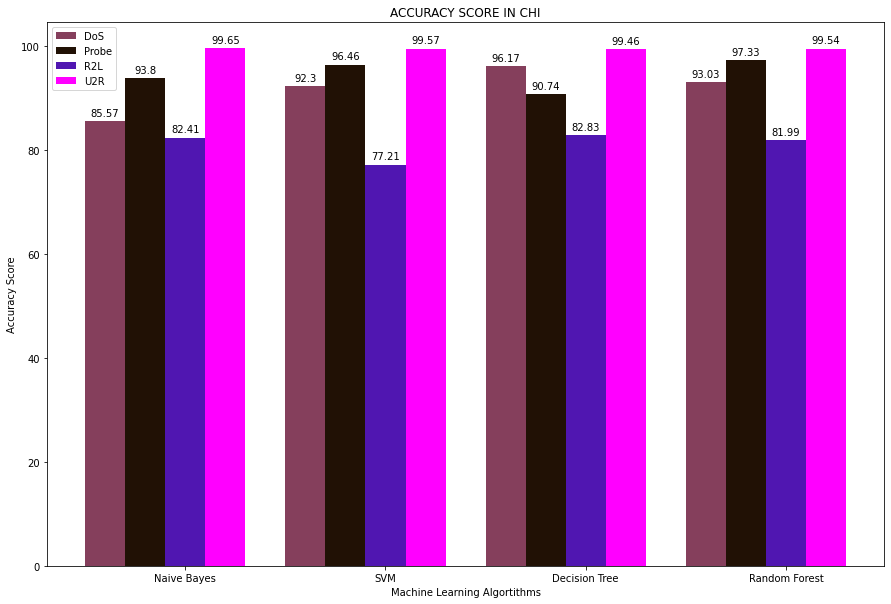

In [54]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.4, y[i]+1, round(y[i],2), ha = 'center')
def addlabels2(x,y):
    for i in range(len(x)):
        plt.text(i-0.2, y[i]+1, round(y[i],2), ha = 'center')
def addlabels3(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, round(y[i],2), ha = 'center')
def addlabels4(x,y):
    for i in range(len(x)):
        plt.text(i+0.2, y[i]+1, round(y[i],2), ha = 'center')

names=['Naive Bayes','SVM','Decision Tree','Random Forest']
AccuracyScore1=[accNB1*100,accSVM1*100,accDT1*100,accRF1*100]
AccuracyScore2=[accNB2*100,accSVM2*100,accDT2*100,accRF2*100]
AccuracyScore3=[accNB3*100,accSVM3*100,accDT3*100,accRF3*100]
AccuracyScore4=[accNB4*100,accSVM4*100,accDT4*100,accRF4*100]
plt.figure(figsize=(15,10))
X_axis = np.arange(len(names))
plt.bar(X_axis-0.4,AccuracyScore1,0.2,color='#853F5C')
plt.bar(X_axis-0.2,AccuracyScore2,0.2,color='#211105')
plt.bar(X_axis, AccuracyScore3,0.2,color='#5016B1')
plt.bar(X_axis+0.2,AccuracyScore4,0.2,color='magenta')
addlabels(names, AccuracyScore1)
addlabels2(names, AccuracyScore2)
addlabels3(names, AccuracyScore3)
addlabels4(names, AccuracyScore4)
plt.title("ACCURACY SCORE IN CHI")
plt.xlabel("Machine Learning Algortithms")
plt.ylabel("Accuracy Score")
plt.xticks(X_axis, names)
plt.legend(['DoS','Probe', 'R2L','U2R'])
#plt.legend(names)
plt.savefig("Accuracy in CHI",dpi=500)

In [55]:
X_train = df_train.drop(columns='label')
Y_train = df_train.label
X_test = df_test.drop(columns='label')
Y_test = df_test.label

In [56]:
scaler = MinMaxScaler().fit(X_test)
X_test = scaler.transform(X_test)
scaler_t = MinMaxScaler().fit(X_train)
X_train = scaler_t.transform(X_train)

# Model creation and Evaluation

Nach der Datenaufbereitung haben wir nun 32 Features mit denen wir unsere 4 verschiedenen Modelle trainieren können:
    - Random Forest
    - Descision Tree
    - Support Vector Machine
    - Naive Baes
Daraufhin könenn wir die trainierten Modelle mit unseren Trainingsdaten auswerten.     

In [57]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf3 = BernoulliNB()
clf4 = LinearSVC(random_state=0)
clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)
clf3.fit(X_train, Y_train)
clf4.fit(X_train, Y_train)
accDT = clf1.score(X_test, Y_test)
accRF = clf2.score(X_test, Y_test)
accNB = clf3.score(X_test, Y_test)
accLR = clf4.score(X_test, Y_test)

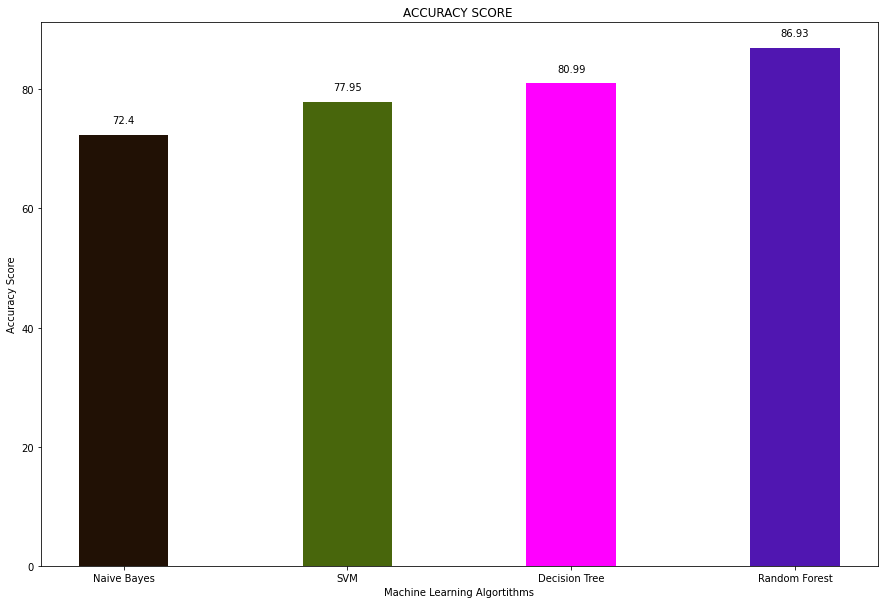

In [58]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+2, round(y[i],2), ha = 'center')
names=['Naive Bayes','SVM','Decision Tree','Random Forest']
AccuracyScore=[accNB*100,accLR*100,accDT*100,accRF*100]
plt.figure(figsize=(15,10))
plt.bar(names,AccuracyScore,0.4,color=['#211105','#48660C','magenta','#5016B1','brown'])
addlabels(names, AccuracyScore)
plt.title("ACCURACY SCORE ")
plt.xlabel("Machine Learning Algortithms")
plt.ylabel("Accuracy Score")
# plt.legend(names)
plt.savefig("Accuracy",dpi=500)

Im obrigen Graph lassen sich die Genauigkeiten der Vorhersagen auf den Trainingsdaten für alle Modelle auslesen. 
Random Forest macht hierbei mit knapp 87% die besten Vorhersagen. Im Anschluss haben wir das Descision Tree Model mit 
knapp 81% und das SVM Modell mit fast 78%. Am schlechtesten hat das Naive Bayes Model abgeschnitten mit nur gut 72%.

Im Anschluss wollen wir sehen, ob wir mit Feature Selection, oder mit dem Ausgleich unserer unausgeglichenen Daten unsere 
Ergebnisse verbessern können.

# Imbalanced Data

Wir man in der folgenden Grafik sehen kann, sind die Daten sehr unausgeglichen, unteranderem haben wir für die vierte Klasse an Angriffen den U2R Angriffen nur 82 Dateneinträge, im Gegensatz dazu haben wir über 67 000 normale Einträge. Aus diesem Grund probieren die Smote Methode aus, welche neue Datensätze generiert im gelichen Verhältniss, in dem sie vorher waren innerhalb der Kategorieren.
Hierdurch lassen sich alle 4 Angriffskategorieren auf die gleiche Anzahl an Einträgen erhöhen, in unserem 67 343 Einträge pro Kategorie.

Class=0, n=67343 (51.913%)
Class=1, n=47646 (36.729%)
Class=3, n=1681 (1.296%)
Class=2, n=12971 (9.999%)
Class=4, n=82 (0.063%)


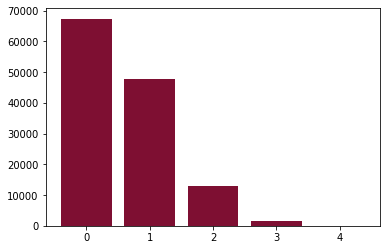

<Figure size 432x288 with 0 Axes>

In [59]:
from collections import Counter
df_train_data=df_train.values
X_before, y_before = df_train_data[:, :-1], df_train_data[:, -1]
counter = Counter(y_before)
for k,v in counter.items():
	per = v / len(y_before) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values(),color="#7E0F32")

plt.show()
plt.savefig("Label distribution",dpi=500)

In [60]:
X_train = df_train.drop(columns='label')
Y_train = df_train.label
X_test = df_test.drop(columns='label')
Y_test = df_test.label

scaler = MinMaxScaler().fit(X_test)
X_test = scaler.transform(X_test)
scaler_t = MinMaxScaler().fit(X_train)
X_train = scaler_t.transform(X_train)

df_train_x=pd.DataFrame(X_train,columns=colNames)
df_test_x=pd.DataFrame(X_train,columns=colNames)

cols=df_train_x.columns.tolist()
train_x=df_train_x[cols]
train_y=Y_train

In [61]:
from imblearn.over_sampling import SMOTE

df_train_data=df_train.values
X_before, y_before = df_train_data[:, :-1], df_train_data[:, -1]

label_list=train_y.tolist()
train_x['label']=label_list

#this  usually takes 3-4 minutes
data = train_x.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
# y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

df_train_X=pd.DataFrame(X,columns=cols)

label="label"
df_train_Y=pd.DataFrame(y)

df_train_Y.rename(columns={0:"label"},inplace=True)

X_train=df_train_X
Y_train=df_train_Y

In [62]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf3 = BernoulliNB()
clf4 = LinearSVC(random_state=0)
clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)
clf3.fit(X_train, Y_train)
clf4.fit(X_train, Y_train)
accDT = clf1.score(X_test, Y_test)
accRF = clf2.score(X_test, Y_test)
accNB = clf3.score(X_test, Y_test)
accLR = clf4.score(X_test, Y_test)

/var/folders/dv/sj53dhnj19x7rg0lcfjy3l140000gq/T/ipykernel_35487/3699590337.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(X_train, Y_train)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/s

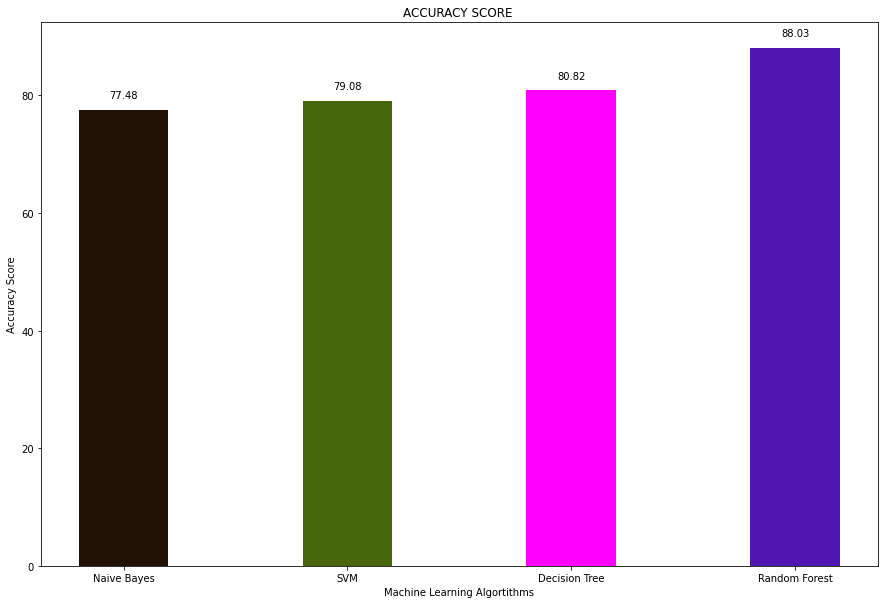

In [63]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+2, round(y[i],2), ha = 'center')
names=['Naive Bayes','SVM','Decision Tree','Random Forest']
AccuracyScore=[accNB*100,accLR*100,accDT*100,accRF*100]
plt.figure(figsize=(15,10))
plt.bar(names,AccuracyScore,0.4,color=['#211105','#48660C','magenta','#5016B1','brown'])
addlabels(names, AccuracyScore)
plt.title("ACCURACY SCORE ")
plt.xlabel("Machine Learning Algortithms")
plt.ylabel("Accuracy Score")
# plt.legend(names)
plt.savefig("Accuracy",dpi=500)

Nun wollen wir betrachten wir sich das ausgleichen der Daten mittels der Smote Methode auf die vier einzelnen Angriffsmethoden DoS, Probe, R2L und U2R auswirkt. Und ob sie ebnso einen postiven Effekt auf die Daten haben oder nicht.

In [64]:
df_train_label_dos=DoS_df['label']
df_test_label_dos=DoS_df_test['label']
df_train_label_probe=Probe_df['label']
df_test_label_probe=Probe_df_test['label']
df_train_label_R2L=R2L_df['label']
df_test_label_R2L=R2L_df_test['label']
df_train_label_U2R=U2R_df['label']
df_test_label_U2R=U2R_df_test['label']

In [65]:
def prepData(X_train, X_test, Y_train, train_df):

    df_train_x=pd.DataFrame(X_train,columns=colNames)
    df_test_x=pd.DataFrame(X_test,columns=colNames)

    cols=df_train_x.columns.tolist()
    train_x=df_train_x[cols]
    train_y=Y_train

    df_train_data=train_df.values
    X_before, y_before = df_train_data[:, :-1], df_train_data[:, -1]

    label_list=train_y.tolist()
    train_x['label']=label_list

    #this  usually takes 3-4 minutes
    data = train_x.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    # label encode the target variable
    # y = LabelEncoder().fit_transform(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)

    df_train_X=pd.DataFrame(X,columns=cols)

    label="label"
    df_train_Y=pd.DataFrame(y)

    df_train_Y.rename(columns={0:"label"},inplace=True)

    X_train=df_train_X
    Y_train=df_train_Y

    #features = SelectKBest(score_func=chi2, k=x_train.shape[1])

    #fit features to the training dataset
    #fit = features.fit(train_x, train_y)
   
    # perform selectkbest with k=40
    #features = SelectKBest(score_func=chi2, k=25)
    #fit = features.fit(train_x,train_y)
    #train_x = fit.transform(train_x)

    #new_features = df_train_X.columns[features.get_support(indices=True)]

    return X_train, Y_train

In [66]:
X_train_dos, Y_train_dos = prepData(X_DoS, X_DoS_test, Y_DoS, DoS_df)
X_train_probe, Y_train_probe = prepData(X_Probe, X_Probe_test, Y_Probe, Probe_df)
X_train_R2L, Y_train_R2L = prepData(X_R2L, X_R2L_test, Y_R2L, R2L_df)
X_train_U2R, Y_train_U2R = prepData(X_U2R, X_U2R_test, Y_U2R, U2R_df)

In [67]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = DecisionTreeClassifier(random_state=0)
clf3 = DecisionTreeClassifier(random_state=0)
clf4 = DecisionTreeClassifier(random_state=0)
t = time()
clf1.fit(X_DoS, Y_DoS)
clf2.fit(X_Probe, Y_Probe)
clf3.fit(X_R2L, Y_R2L)
clf4.fit(X_U2R, Y_U2R)

accDT1 = clf1.score(X_DoS_test, Y_DoS_test)
accDT2 = clf2.score(X_Probe_test, Y_Probe_test)
accDT3 = clf3.score(X_R2L_test, Y_R2L_test)
accDT4 = clf4.score(X_U2R_test, Y_U2R_test)

In [68]:
clf1 = RandomForestClassifier(n_estimators=300, random_state = 40, n_jobs =-1)
clf1 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf2 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf3 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf4 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf1.fit(X_DoS, Y_DoS)
clf2.fit(X_Probe, Y_Probe)
clf3.fit(X_R2L, Y_R2L)
clf4.fit(X_U2R, Y_U2R)

accRF1 = clf1.score(X_DoS_test, Y_DoS_test)
accRF2 = clf2.score(X_Probe_test, Y_Probe_test)
accRF3 = clf3.score(X_R2L_test, Y_R2L_test)
accRF4 = clf4.score(X_U2R_test, Y_U2R_test)

In [69]:
clf1 = BernoulliNB()
clf2 = BernoulliNB()
clf3 = BernoulliNB()
clf4 = BernoulliNB()
t0 = time()
clf1.fit(X_DoS, Y_DoS)
clf2.fit(X_Probe, Y_Probe)
clf3.fit(X_R2L, Y_R2L)
clf4.fit(X_U2R, Y_U2R)
accNB1 = clf1.score(X_DoS_test, Y_DoS_test)
accNB2 = clf2.score(X_Probe_test, Y_Probe_test)
accNB3 = clf3.score(X_R2L_test, Y_R2L_test)
accNB4 = clf4.score(X_U2R_test, Y_U2R_test)

In [70]:
clf1= LinearSVC(random_state=0)
clf2= LinearSVC(random_state=0)
clf3= LinearSVC(random_state=0)
clf4= LinearSVC(random_state=0)
t0 = time()
clf1.fit(X_DoS, Y_DoS)
clf2.fit(X_Probe, Y_Probe)
clf3.fit(X_R2L, Y_R2L)
clf4.fit(X_U2R, Y_U2R)
accSVM1 = clf1.score(X_DoS_test, Y_DoS_test)
accSVM2 = clf2.score(X_Probe_test, Y_Probe_test)
accSVM3 = clf3.score(X_R2L_test, Y_R2L_test)
accSVM4 = clf4.score(X_U2R_test, Y_U2R_test)

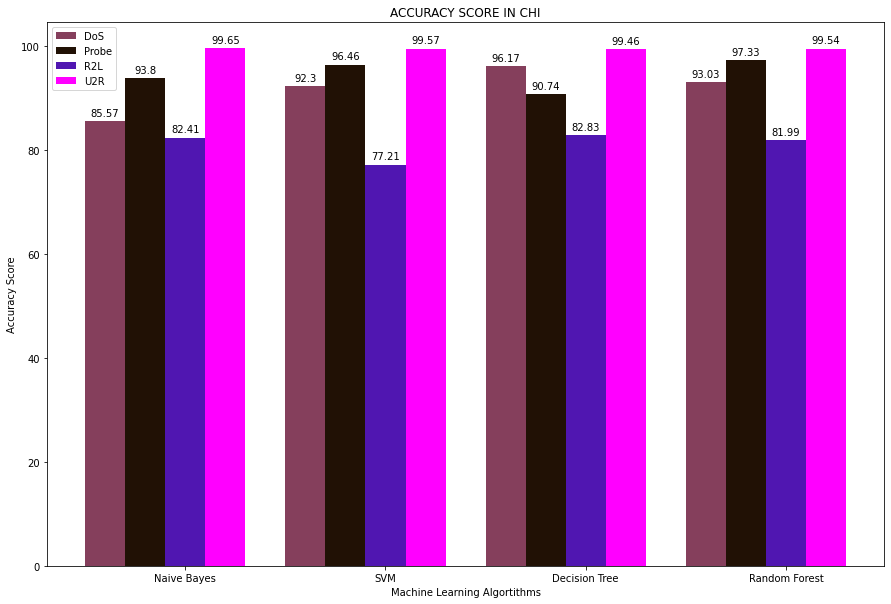

In [71]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.4, y[i]+1, round(y[i],2), ha = 'center')
        
names=['Naive Bayes','SVM','Decision Tree','Random Forest']
AccuracyScore1=[accNB1*100,accSVM1*100,accDT1*100,accRF1*100]
AccuracyScore2=[accNB2*100,accSVM2*100,accDT2*100,accRF2*100]
AccuracyScore3=[accNB3*100,accSVM3*100,accDT3*100,accRF3*100]
AccuracyScore4=[accNB4*100,accSVM4*100,accDT4*100,accRF4*100]
plt.figure(figsize=(15,10))
X_axis = np.arange(len(names))
plt.bar(X_axis-0.4,AccuracyScore1,0.2,color='#853F5C')
plt.bar(X_axis-0.2,AccuracyScore2,0.2,color='#211105')
plt.bar(X_axis, AccuracyScore3,0.2,color='#5016B1')
plt.bar(X_axis+0.2,AccuracyScore4,0.2,color='magenta')
addlabels(names, AccuracyScore1)
addlabels2(names, AccuracyScore2)
addlabels3(names, AccuracyScore3)
addlabels4(names, AccuracyScore4)
plt.title("ACCURACY SCORE IN CHI")
plt.xlabel("Machine Learning Algortithms")
plt.ylabel("Accuracy Score")
plt.xticks(X_axis, names)
plt.legend(['DoS','Probe', 'R2L','U2R'])
#plt.legend(names)
plt.savefig("Accuracy in CHI",dpi=500)

# Feature Selection

In [72]:
X_train.shape

(336715, 32)

Unsere Trainingsdaten umfassen 32 Features. Mittels der Feature Selection und KBestSelection Methode, können wir uns die 
Aussagekraft der einzelnen Features ausgeben lassen und somit Entscheidungen treffen darüber welche Features relevant für das 
trainieren unserer Modell sind und welche wir auslassen können um gegebenen falls Trainingszeit zu sparen oder unsere 
Ergebnisse der Genauigkeit zu verbessern. In der Grafik unten weist die kBestSelection jedem Feature einen Wert zu, 
der dessen Aussagekraft darstellt. Anhand dieser Ergebnisse kann man schon erkennen, dass einige Features keinerlei Relevanz 
für unsere Modelle haben werdem.

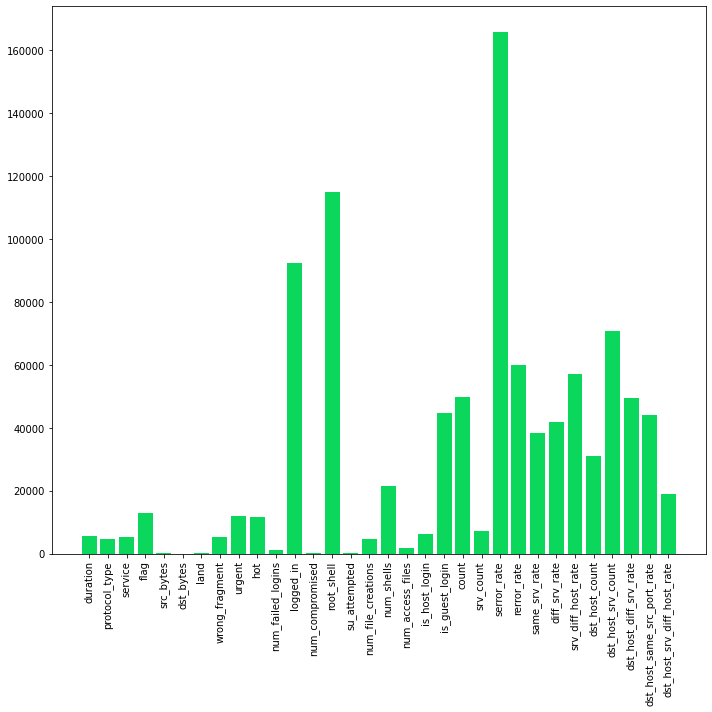

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
features = SelectKBest(score_func=chi2, k=X_train.shape[1])

#fit features to the training dataset
fit = features.fit(X_train, Y_train)
# plot the score associated with each feature
plt.figure(figsize=(10,10))
plt.bar([i for i in range(len(features.scores_))], features.scores_,color='#0BD75C')
plt.xticks([i for i in range(len(features.scores_))], df_train.drop(columns='label').columns)
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('features', dpi=500)


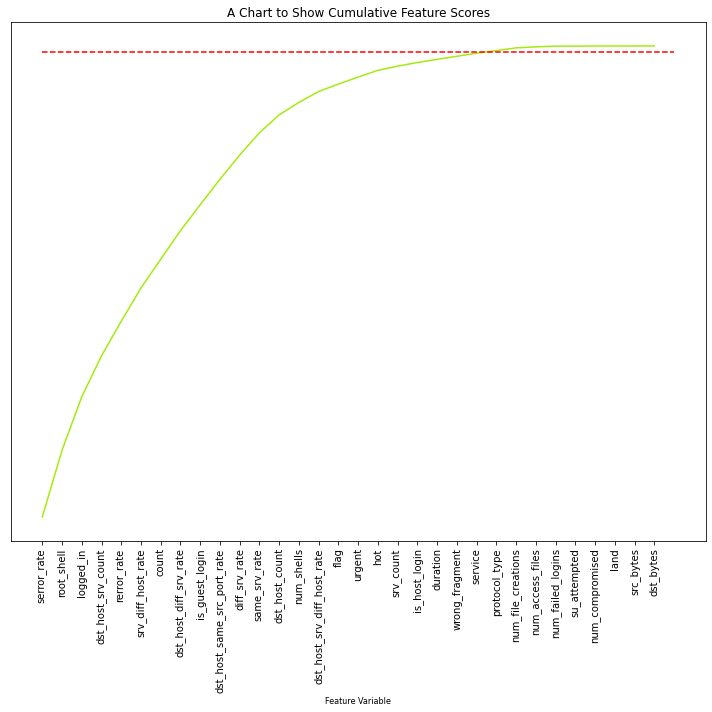

In [74]:
# sort the features by importance score
plt.figure(figsize=(10,10))
feature_importances = zip(df_train.drop(columns='label').columns, features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances,color='#A2EC0D')

# Draw line at 99% of importance retained 
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical',)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=8)
plt.title('A Chart to Show Cumulative Feature Scores')
#plt.figure(figsize=(500,200))
plt.tight_layout()
plt.savefig('cum_features', dpi=500)

Um die Daten besser bewerten zu können, sortieren wir die Features nach ihren k Werten aus der kBestSelection. In der Grafik 
oben werden die aufkummulierten Werte dargsetellt und es lässt sich erkennen, dass nach 25 Features die 99% Marke erreicht ist.
Und die restlichen Features nicht mehr viel zum Endergebniss beitragen. Was bedeutet wir berechnen unsere Modelle neu, indem
wir nur die 25 besten Features betrachten, welche für den gesamten Datensatz folgende sind:

In [75]:
selector = SelectKBest(score_func=chi2, k=25)

df_X_Train = pd.DataFrame(X_train, columns=colNames)
df_X_test = pd.DataFrame(X_test, columns=colNames)
fit = selector.fit(X_train, Y_train)
X_train = fit.transform(X_train)
new_features = df_X_Train.columns[selector.get_support(indices=True)]

df_train_model=df_X_Train[new_features]
df_test_model=df_X_test[new_features]

X_train=df_train_model
X_test=df_test_model

scaler = MinMaxScaler().fit(X_test)
X_test = scaler.transform(X_test)
scaler_t = MinMaxScaler().fit(X_train)
X_train = scaler_t.transform(X_train)

In [76]:
new_features

Index(['duration', 'protocol_type', 'service', 'flag', 'wrong_fragment',
       'urgent', 'hot', 'logged_in', 'root_shell', 'num_file_creations',
       'num_shells', 'is_host_login', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate'],
      dtype='object')

In [77]:
X_train.shape

(336715, 25)

In [78]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf3 = BernoulliNB()
clf4 = LinearSVC(random_state=0)
clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)
clf3.fit(X_train, Y_train)
clf4.fit(X_train, Y_train)
accDT = clf1.score(X_test, Y_test)
accRF = clf2.score(X_test, Y_test)
accNB = clf3.score(X_test, Y_test)
accLR = clf4.score(X_test, Y_test)

/var/folders/dv/sj53dhnj19x7rg0lcfjy3l140000gq/T/ipykernel_35487/3699590337.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(X_train, Y_train)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


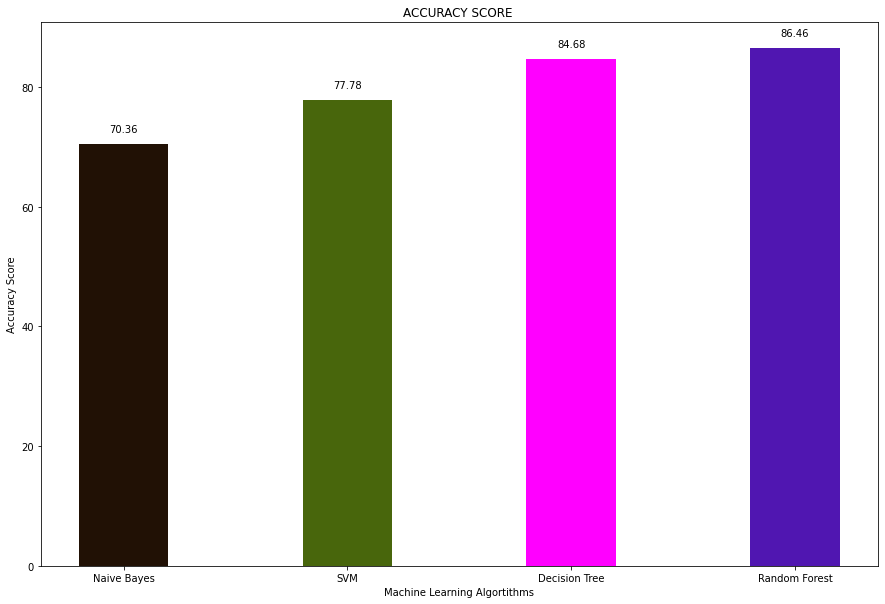

In [79]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+2, round(y[i],2), ha = 'center')
names=['Naive Bayes','SVM','Decision Tree','Random Forest']
AccuracyScore=[accNB*100,accLR*100,accDT*100,accRF*100]
plt.figure(figsize=(15,10))
plt.bar(names,AccuracyScore,0.4,color=['#211105','#48660C','magenta','#5016B1','brown'])
addlabels(names, AccuracyScore)
plt.title("ACCURACY SCORE ")
plt.xlabel("Machine Learning Algortithms")
plt.ylabel("Accuracy Score")
# plt.legend(names)
plt.savefig("Accuracy",dpi=500)

Wie man hier an den Ergebnissen sehen kann, haben sich die Ergebnisse der Vorhersagen der Trainingsdaten nicht verbessert, sondern leicht verschlechert und bei der Support Vector Machine sogar sehr stark. Aus diesem Grund und durch den zusätzlichen Rechenaufwand durch die Feature Selection, lohnt es sich für unsere Daten nicht Feature Selection durchzuführen und wir behalten die ursprünglichen Daten bei. Die Ergbenisse haben sich für alle Modelle deutlich verschlechert. Bei der Support Vector Machine um soga

In [80]:
def prepData(X_train, X_test, Y_train):

    df_X_Train = pd.DataFrame(X_train, columns=colNames)
    df_X_test = pd.DataFrame(X_test, columns=colNames)
    fit = selector.fit(X_train, Y_train)
    X_train = fit.transform(X_train)
    new_features = df_X_Train.columns[selector.get_support(indices=True)]

    df_train_model=df_X_Train[new_features]
    df_test_model=df_X_test[new_features]

    X_train=df_train_model
    X_test=df_test_model

    return X_test, X_train

In [81]:
X_train_dos, Y_train_dos = prepData(X_DoS, X_DoS_test, Y_DoS)
X_train_probe, Y_train_probe = prepData(X_Probe, X_Probe_test, Y_Probe)
X_train_R2L, Y_train_R2L = prepData(X_R2L, X_R2L_test, Y_R2L)
X_train_U2R, Y_train_U2R = prepData(X_U2R, X_U2R_test, Y_U2R)

In [82]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = DecisionTreeClassifier(random_state=0)
clf3 = DecisionTreeClassifier(random_state=0)
clf4 = DecisionTreeClassifier(random_state=0)
t = time()
clf1.fit(X_DoS, Y_DoS)
clf2.fit(X_Probe, Y_Probe)
clf3.fit(X_R2L, Y_R2L)
clf4.fit(X_U2R, Y_U2R)

accDT1 = clf1.score(X_DoS_test, Y_DoS_test)
accDT2 = clf2.score(X_Probe_test, Y_Probe_test)
accDT3 = clf3.score(X_R2L_test, Y_R2L_test)
accDT4 = clf4.score(X_U2R_test, Y_U2R_test)

In [83]:
clf1 = RandomForestClassifier(n_estimators=300, random_state = 40, n_jobs =-1)
clf1 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf2 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf3 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf4 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf1.fit(X_DoS, Y_DoS)
clf2.fit(X_Probe, Y_Probe)
clf3.fit(X_R2L, Y_R2L)
clf4.fit(X_U2R, Y_U2R)

accRF1 = clf1.score(X_DoS_test, Y_DoS_test)
accRF2 = clf2.score(X_Probe_test, Y_Probe_test)
accRF3 = clf3.score(X_R2L_test, Y_R2L_test)
accRF4 = clf4.score(X_U2R_test, Y_U2R_test)

In [84]:
clf1 = BernoulliNB()
clf2 = BernoulliNB()
clf3 = BernoulliNB()
clf4 = BernoulliNB()
t0 = time()
clf1.fit(X_DoS, Y_DoS)
clf2.fit(X_Probe, Y_Probe)
clf3.fit(X_R2L, Y_R2L)
clf4.fit(X_U2R, Y_U2R)
accNB1 = clf1.score(X_DoS_test, Y_DoS_test)
accNB2 = clf2.score(X_Probe_test, Y_Probe_test)
accNB3 = clf3.score(X_R2L_test, Y_R2L_test)
accNB4 = clf4.score(X_U2R_test, Y_U2R_test)

In [85]:
clf1= LinearSVC(random_state=0)
clf2= LinearSVC(random_state=0)
clf3= LinearSVC(random_state=0)
clf4= LinearSVC(random_state=0)
t0 = time()
clf1.fit(X_DoS, Y_DoS)
clf2.fit(X_Probe, Y_Probe)
clf3.fit(X_R2L, Y_R2L)
clf4.fit(X_U2R, Y_U2R)
accSVM1 = clf1.score(X_DoS_test, Y_DoS_test)
accSVM2 = clf2.score(X_Probe_test, Y_Probe_test)
accSVM3 = clf3.score(X_R2L_test, Y_R2L_test)
accSVM4 = clf4.score(X_U2R_test, Y_U2R_test)

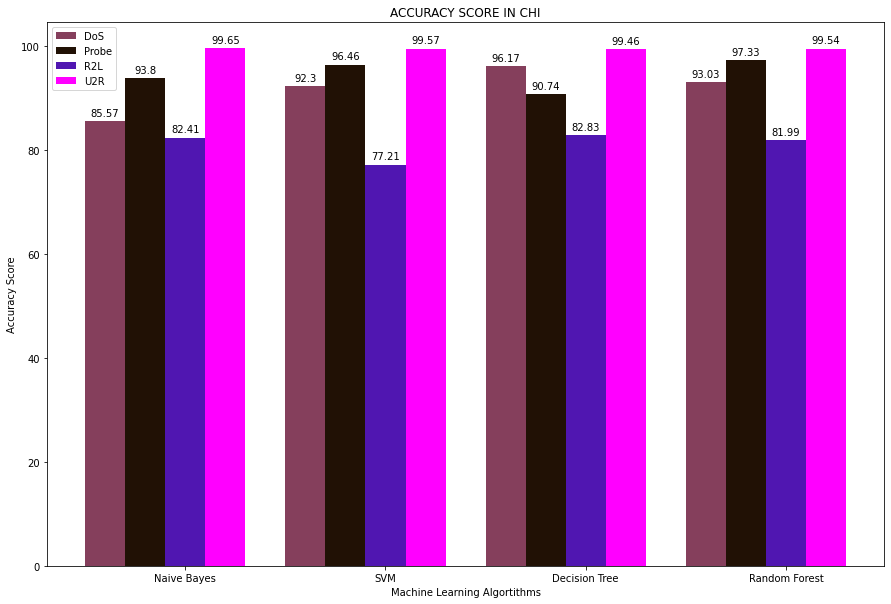

In [86]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.4, y[i]+1, round(y[i],2), ha = 'center')
        
names=['Naive Bayes','SVM','Decision Tree','Random Forest']
AccuracyScore1=[accNB1*100,accSVM1*100,accDT1*100,accRF1*100]
AccuracyScore2=[accNB2*100,accSVM2*100,accDT2*100,accRF2*100]
AccuracyScore3=[accNB3*100,accSVM3*100,accDT3*100,accRF3*100]
AccuracyScore4=[accNB4*100,accSVM4*100,accDT4*100,accRF4*100]
plt.figure(figsize=(15,10))
X_axis = np.arange(len(names))
plt.bar(X_axis-0.4,AccuracyScore1,0.2,color='#853F5C')
plt.bar(X_axis-0.2,AccuracyScore2,0.2,color='#211105')
plt.bar(X_axis, AccuracyScore3,0.2,color='#5016B1')
plt.bar(X_axis+0.2,AccuracyScore4,0.2,color='magenta')
addlabels(names, AccuracyScore1)
addlabels2(names, AccuracyScore2)
addlabels3(names, AccuracyScore3)
addlabels4(names, AccuracyScore4)
plt.title("ACCURACY SCORE IN CHI")
plt.xlabel("Machine Learning Algortithms")
plt.ylabel("Accuracy Score")
plt.xticks(X_axis, names)
plt.legend(['DoS','Probe', 'R2L','U2R'])
#plt.legend(names)
plt.savefig("Accuracy in CHI",dpi=500)